<a href="https://colab.research.google.com/github/boyu571/kpc_lecture_notes/blob/master/ABC%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
########  Step.01  ########
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] = 'NanumGothic'

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
from google.colab import files
myfile = files.upload()
#df = pd.read_excel(r'C:\Users\mk-lenovo-151\OneDrive\바탕 화면\abc분석_파이썬\'재고_DATA.xlsx'')

In [3]:
########  Step.02  ########
#파일 종류 설정 (read_excel or read_csv)
df = pd.read_excel('재고_DATA.xlsx')
df

,순번,코드,단위,일평균 재고수량
0,1,P04356-04A,kit,100
1,2,P04667-34A,kit,100
2,3,P04580-04A,kit,100
3,4,P01302-04A,kit,100
4,5,P04472-04A,kit,100
...,...,...,...,...
95,96,P05047-14A,kit,110
96,97,P06536-14A,kit,456
97,98,P04195-34A,kit,243
98,99,P04136-04A,kit,363


In [4]:
########  Step.03  ########
#내림차순
df = df.sort_values(by='일평균 재고수량',ascending=False)

#'일평균 재고수량'의 합계
Total = df['일평균 재고수량'].sum()
Total

57704

In [5]:
#df['비율(%)'] = df['일평균 재고수량']/'Total'
df['비율'] = df['일평균 재고수량']/Total
df

,순번,코드,단위,일평균 재고수량,비율
60,61,P07729-14A,kit,13206,0.228858
99,100,P06705-04A,kit,10414,0.180473
80,81,P04411-04A,kit,3918,0.067898
70,71,P04356-14A,kit,2911,0.050447
40,41,P05401-14A,kit,1507,0.026116
...,...,...,...,...,...
20,21,P05104-14A,kit,20,0.000347
78,79,P04360-04A,kit,13,0.000225
45,46,P04391-04A,kit,8,0.000139
73,74,P04382-040,kit,7,0.000121


In [6]:

########  Step.04  ########
#누계비율 구하기
import itertools
df['누계비율'] = list(itertools.accumulate(df['비율']))
df['누계비율(%)'] = df['누계비율'] * 100.0
df = df.round(1)
df

,순번,코드,단위,일평균 재고수량,비율,누계비율,누계비율(%)
60,61,P07729-14A,kit,13206,0.2,0.2,22.9
99,100,P06705-04A,kit,10414,0.2,0.4,40.9
80,81,P04411-04A,kit,3918,0.1,0.5,47.7
70,71,P04356-14A,kit,2911,0.1,0.5,52.8
40,41,P05401-14A,kit,1507,0.0,0.6,55.4
...,...,...,...,...,...,...,...
20,21,P05104-14A,kit,20,0.0,1.0,99.9
78,79,P04360-04A,kit,13,0.0,1.0,100.0
45,46,P04391-04A,kit,8,0.0,1.0,100.0
73,74,P04382-040,kit,7,0.0,1.0,100.0


In [7]:
########  Step.05  ########
def func(ar) :
    if ar < 80 :
        return "A"
    elif ar >= 90:
        return "C"
    else:
        return "B"

df['stock level'] = df['누계비율(%)'].apply(func)
df


,순번,코드,단위,일평균 재고수량,비율,누계비율,누계비율(%),stock level
60,61,P07729-14A,kit,13206,0.2,0.2,22.9,A
99,100,P06705-04A,kit,10414,0.2,0.4,40.9,A
80,81,P04411-04A,kit,3918,0.1,0.5,47.7,A
70,71,P04356-14A,kit,2911,0.1,0.5,52.8,A
40,41,P05401-14A,kit,1507,0.0,0.6,55.4,A
...,...,...,...,...,...,...,...,...
20,21,P05104-14A,kit,20,0.0,1.0,99.9,C
78,79,P04360-04A,kit,13,0.0,1.0,100.0,C
45,46,P04391-04A,kit,8,0.0,1.0,100.0,C
73,74,P04382-040,kit,7,0.0,1.0,100.0,C


In [8]:
########  Step.06  ########
df_pivot = pd.pivot_table(df, columns = ['stock level'], values = ['코드'],aggfunc =['count'])
df_pivot

count        
stock level     A   B   C
코드             22  20  58

In [9]:
########  Step.07  ########
myfile = files.upload()
#dt = pd.read_excel(r'C:\Users\mk-lenovo-151\OneDrive\바탕 화면\abc분석_파이썬\출고_DATA.xlsx')

NameError: name 'files' is not defined

In [10]:
########  Step.08  ########
#파일 종류 설정 (read_excel or read_csv)
dt = pd.read_excel('출고_DATA.xlsx')
dt


,순번,코드,단위,평균 출고금액
0,1,P04356-04A,kit,4921
1,2,P04667-34A,kit,5072
2,3,P04580-04A,kit,4378
3,4,P01302-04A,kit,3589
4,5,P04472-04A,kit,5681
...,...,...,...,...
95,96,P05047-14A,kit,1948
96,97,P06536-14A,kit,5007
97,98,P04195-34A,kit,3743
98,99,P04136-04A,kit,17904


In [11]:
########  Step.09  ########
#내림차순
dt = dt.sort_values(by='평균 출고금액',ascending=False)

#'일평균 재고수량'의 합계
Total = dt['평균 출고금액'].sum()

#dt['비율(%)'] = dt['일평균 재고수량']/'Total'
dt['비율'] = dt['평균 출고금액']/Total

#누계비율 구하기
import itertools
dt['누계비율'] = list(itertools.accumulate(dt['비율']))
dt['누계비율(%)'] = dt['누계비율'] * 100.0
dt = dt.round(2)
dt

,순번,코드,단위,평균 출고금액,비율,누계비율,누계비율(%)
14,15,P05297-14A,kit,312314,0.14,0.14,13.67
30,31,P04168-04A,kit,311682,0.14,0.27,27.32
80,81,P04411-04A,kit,211560,0.09,0.37,36.58
88,89,P04360-14A,kit,191333,0.08,0.45,44.96
86,87,P05120-040,kit,190867,0.08,0.53,53.31
...,...,...,...,...,...,...,...
82,83,P04846-04A,kit,646,0.00,1.00,99.94
68,69,P05482-14A,kit,643,0.00,1.00,99.97
24,25,P05248-14A,kit,317,0.00,1.00,99.98
47,48,P05034-04A,kit,300,0.00,1.00,99.99


In [12]:
def func(ar) :
    if ar < 80 :
        return "A"
    elif ar >= 90:
        return "C"
    else:
        return "B"

dt['release level'] = dt['누계비율(%)'].apply(func)


dt1 = dt.groupby(['release level'])[['release level']].count()
dt1 = dt1.transpose()
# 누계비율 80% 미만
# 누계비율 80%이상 ~ 90%미만
# 누계비율 90% 이상

dt1

release level,A,B,C
release level,16,21,63


In [13]:
########  Step.10  ########
# dt, df 데이터 합치기
df_ABC통합=df.join(dt.set_index('코드')['release level'], on='코드')
df_ABC통합


,순번,코드,단위,일평균 재고수량,비율,누계비율,누계비율(%),stock level,release level
60,61,P07729-14A,kit,13206,0.2,0.2,22.9,A,A
99,100,P06705-04A,kit,10414,0.2,0.4,40.9,A,C
80,81,P04411-04A,kit,3918,0.1,0.5,47.7,A,A
70,71,P04356-14A,kit,2911,0.1,0.5,52.8,A,B
40,41,P05401-14A,kit,1507,0.0,0.6,55.4,A,B
...,...,...,...,...,...,...,...,...,...
20,21,P05104-14A,kit,20,0.0,1.0,99.9,C,A
78,79,P04360-04A,kit,13,0.0,1.0,100.0,C,B
45,46,P04391-04A,kit,8,0.0,1.0,100.0,C,A
73,74,P04382-040,kit,7,0.0,1.0,100.0,C,C


In [14]:
########  Step.11  ########
#컬럼만 확인
df_ABC통합.columns


Index(['순번', '코드', '단위', '일평균 재고수량', '비율', '누계비율', '누계비율(%)', 'stock level',
       'release level'],
      dtype='object')

In [21]:
########  Step.11_2  ########
#원하는 컬럼만 가져오기
df_ABC통합 = df_ABC통합[['코드', '단위', 'stock level', 'release level']]
df_ABC통합

,코드,단위,stock level,release level
60,P07729-14A,kit,A,A
99,P06705-04A,kit,A,C
80,P04411-04A,kit,A,A
70,P04356-14A,kit,A,B
40,P05401-14A,kit,A,B
...,...,...,...,...
20,P05104-14A,kit,C,A
78,P04360-04A,kit,C,B
45,P04391-04A,kit,C,A
73,P04382-040,kit,C,C


In [28]:
########  Step.12  ########
# 엑셀의 피벗테이블과 같은 기능
# index는 행 인덱스
# columns는 열 인덱스
# values는 조회하고 싶은 값
df_ABC통합_pivot1 = pd.pivot_table(df_ABC통합, index = ['stock level'], columns = ['release level'], values = ['코드'],aggfunc =['count'])
df_ABC통합_pivot1=df_ABC통합_pivot1.rename(columns={'코드':'code'})

df_ABC통합_pivot1 = df_ABC통합_pivot1.reset_index()

df_ABC통합_pivot1

stock level count        
                           code        
release level                 A   B   C
0                       A     4   7  11
1                       B     3   4  13
2                       C     9  10  39

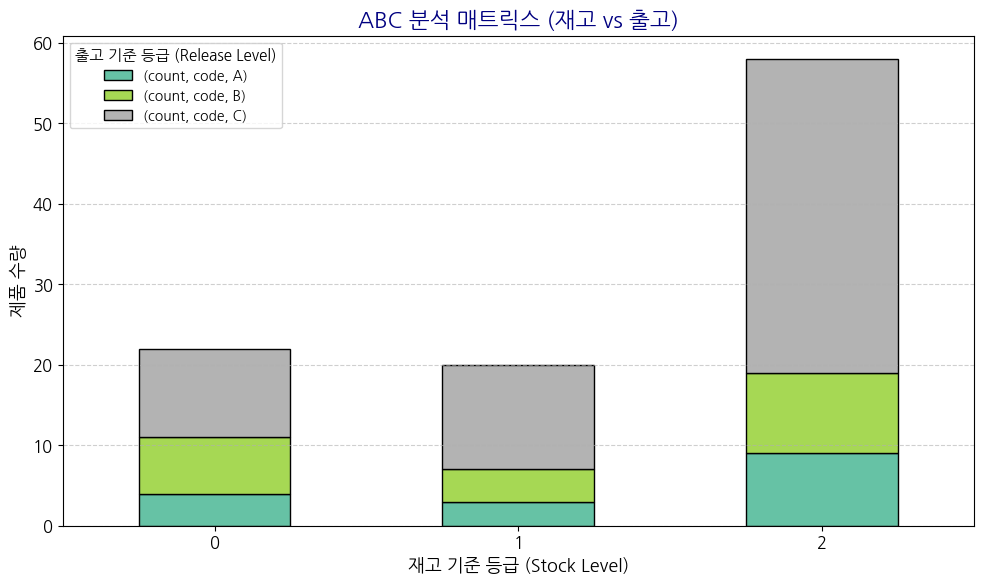

In [36]:
########  Step.13  ########
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)  # 그래프 크기 조정
plt.rc('font', size=12)  # 폰트 크기 적당히 조정

df_시각화 = df_ABC통합_pivot1.plot(
    kind='bar',
    stacked=True,             # stacked bar로 가독성 향상
    colormap='Set2',          # 보기 쉬운 색상 세트 적용
    edgecolor='black'         # 막대 테두리 추가
)

plt.title("ABC 분석 매트릭스 (재고 vs 출고)", fontsize=16, color='navy')
plt.xlabel("재고 기준 등급 (Stock Level)", fontsize=13)
plt.ylabel("제품 수량", fontsize=13)
plt.xticks(rotation=0)
plt.legend(title='출고 기준 등급 (Release Level)', title_fontsize=11, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
########  Step.14  ########
myfile = files.upload()
# d = pd.read_excel(r'C:\Users\mk-lenovo-151\OneDrive\바탕 화면\abc분석_파이썬\주문data_raw.xlsx')


Saving 주문data_raw.xlsx to 주문data_raw.xlsx


In [37]:
########  Step.15  ########
#파일 종류 설정 (read_excel or read_csv)
d = pd.read_excel('주문data_raw.xlsx')

########  Step.16  ########
#내림차순
d = d.sort_values(by='월평균 주문',ascending=False)

#'일평균 재고수량'의 합계
Total = d['월평균 주문'].sum()

#df['누계비율(%)'] = df['일평균 재고수량']/'Total'
d['비율'] = d['월평균 주문']/Total

#누계비율 구하기
import itertools
d['누계비율'] = list(itertools.accumulate(d['비율']))
d['누계비율(%)'] = d['누계비율'] * 100.0
d = d.round(2)

def func(ar) :
    if ar < 80 :
        return "A"
    elif ar >= 90:
        return "C"
    else:
        return "B"

d['order level'] = d['누계비율(%)'].apply(func)
d

d1 = d.groupby(['order level'])[['order level']].count()
d1 = d1.transpose()
# 누계비율 80% 미만
# 누계비율 80%이상 ~ 90%미만
# 누계비율 90% 이상
d1

df_ABC통합1=df_ABC통합.join(d.set_index('코드')['order level'], on='코드')
df_ABC통합1

########  Step.17  ########
df_ABC통합_pivot2 = pd.pivot_table(df_ABC통합1, index = ['stock level'], columns = ['release level','order level'], values = ['코드'],aggfunc =['count'])
#df_ABC통합_pivot2 = df_ABC통합_pivot2.reset_index()
df_ABC통합_pivot2 = df_ABC통합_pivot2.fillna(0)
df_ABC통합_pivot2.dtypes

df_ABC통합_pivot2=df_ABC통합_pivot2.rename(columns={'코드':'code'})
df_ABC통합_pivot2.astype('int').reset_index()


stock level count                          
                           code                          
release level                 A        B         C       
order level                   A  B  C  A  B  C   A  B   C
0                       A     3  0  1  3  2  2   6  1   4
1                       B     1  0  2  2  1  1   8  2   3
2                       C     5  1  3  4  1  5  20  4  15

In [38]:
########  Step.19  ########
# 저장하기
df_ABC통합_pivot2.to_excel('ABC분석.xlsx')

## A, B, C 품목 수량 비율을 20%, 30%, 50%으로 고정

In [39]:
import pandas as pd
import itertools

# 데이터 로드
d = pd.read_excel('주문data_raw.xlsx')

# 내림차순 정렬
d = d.sort_values(by='월평균 주문', ascending=False)

# '월평균 주문'의 총합
Total = d['월평균 주문'].sum()

# 비율과 누계비율 계산
d['비율'] = d['월평균 주문'] / Total
d['누계비율'] = list(itertools.accumulate(d['비율']))
d['누계비율(%)'] = d['누계비율'] * 100.0
d = d.round(2)

# 전체 행 개수에 따라 A, B, C 비율에 해당하는 개수 설정 (20%, 30%, 50%)
total_count = len(d)
a_count = int(total_count * 0.2)
b_count = int(total_count * 0.3)
c_count = total_count - a_count - b_count

# 순차적으로 A, B, C 할당
d['order level'] = ['A'] * a_count + ['B'] * b_count + ['C'] * c_count

# A, B, C의 경계 누계비율 값 도출
a_boundary = d.iloc[a_count - 1]['누계비율(%)']  # A 그룹의 마지막 누계비율
b_boundary = d.iloc[a_count + b_count - 1]['누계비율(%)']  # B 그룹의 마지막 누계비율
c_boundary = d['누계비율(%)'].iloc[-1]  # C 그룹의 마지막 누계비율 (100%)

# 경계 누계비율 값 출력
print("A 그룹 경계 누계비율(%) :", a_boundary)
print("B 그룹 경계 누계비율(%) :", b_boundary)
print("C 그룹 경계 누계비율(%) :", c_boundary)

# 등급별 개수 확인
d1 = d.groupby(['order level'])[['order level']].count()
d1 = d1.transpose()

# 코드 기준으로 df_ABC통합 데이터와 병합
df_ABC통합1 = df_ABC통합.join(d.set_index('코드')['order level'], on='코드')

# 최종 데이터 출력
d


A 그룹 경계 누계비율(%) : 41.1
B 그룹 경계 누계비율(%) : 77.61
C 그룹 경계 누계비율(%) : 100.0


,순번,코드,단위,월평균 주문,비율,누계비율,누계비율(%),order level
21,59,P04825-04A,kit,121.0,0.03,0.03,2.57,A
18,67,P04694-14A,kit,113.0,0.02,0.05,4.97,A
66,49,P07250-14A,kit,106.0,0.02,0.07,7.22,A
29,85,P04520-04A,kit,105.0,0.02,0.09,9.45,A
93,74,P04382-040,kit,103.0,0.02,0.12,11.64,A
...,...,...,...,...,...,...,...,...
6,18,P05401-04A,kit,2.0,0.00,1.00,99.92,C
53,40,P04709-04A,kit,2.0,0.00,1.00,99.96,C
1,6,P05538-04A,kit,1.0,0.00,1.00,99.98,C
70,88,P05141-14A,kit,1.0,0.00,1.00,100.00,C
